介绍了numpy中的排序、搜索和j计数函数

In [1]:
import numpy as np

### 1. 排序

numpy内置了多种排序算法：
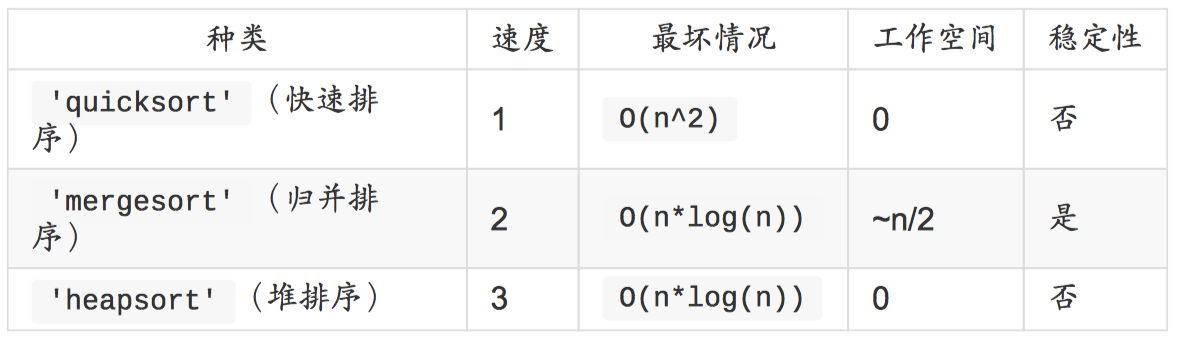

#### 1.1 np.sort()

In [2]:
# numpy.sort(a, axis, kind, order)
# kind默认为'quicksort'
# 返回副本

In [3]:
a = np.array([[3,7], [9,1]])
a

array([[3, 7],
       [9, 1]])

In [4]:
# axis不设置，默认沿着最后一个axis排序
np.sort(a)   # 默认沿着axis=1，即每行进行排序

array([[3, 7],
       [1, 9]])

In [5]:
# axis=0，沿着第一个轴排序，即每列排序
np.sort(a, axis=0)

array([[3, 1],
       [9, 7]])

#### 1.2 np.argsort

In [10]:
# 返回排序的索引
x = np.array([3,1,2])
x

array([3, 1, 2])

In [11]:
# 返回的是排序后数组各元素对应在原数组的索引
y = np.argsort(x)
y

array([1, 2, 0])

In [12]:
# 若要得到原数组的排列顺序，需要再次argsort
np.argsort(x).argsort()

array([2, 0, 1])

In [8]:
# 从索引再得到数据
x[y]

array([1, 2, 3])

#### 1.3 np.lexsort

In [9]:
# 根据键序列进行排序
# np.lexsort(keys, axis=-1),keys为array或tuple，默认axis=-1，即最后一个主键
name = ('Alex', 'Bob', 'Tom', 'Mia')
score = (80, 45, 60, 99)
idx = np.lexsort((name, score))
idx

array([1, 2, 0, 3])

In [13]:
# 获取排序后的对应数组
[name[i] + "," + str(score[i]) for i in idx]

['Bob,45', 'Tom,60', 'Alex,80', 'Mia,99']

#### 1.4 np.argmax和np.argmin

In [14]:
# 沿给定轴返回最大和最小元素的索引
a = np.array([[30, 40, 70], [80, 20, 10], [50, 90, 60]])
a

array([[30, 40, 70],
       [80, 20, 10],
       [50, 90, 60]])

In [15]:
np.argmax(a, axis=0)   # 即每列的最大值的索引

array([1, 2, 0])

In [16]:
np.argmin(a, axis=1)    # 即每行的最小值的索引

array([0, 2, 0])

#### 1.5 np.nonzero

In [17]:
# 返回数组中非零元素的索引
a = np.array([[30,40,0],[0,20,10],[50,0,60]])

In [20]:
b = np.nonzero(a)   # 返回对应轴对应的index
b

(array([0, 0, 1, 1, 2, 2]), array([0, 1, 1, 2, 0, 2]))

In [21]:
# 获取对应非零值
a[b]

array([30, 40, 20, 10, 50, 60])

#### 1.6 np.flatnonzero

In [25]:
# np.flat和np.nonzero的复合，即先flat再获取index
# 常用来进行比较判断，获取index
a = np.array([10, 20, 0, -10, 0, 30])
a

array([ 10,  20,   0, -10,   0,  30])

In [27]:
# 获取不为0值对应的切片
np.flatnonzero(a!=0)

array([0, 1, 3, 5])

In [28]:
a[np.flatnonzero(a!=0)]

array([ 10,  20, -10,  30])

#### 1.7 np.where

In [29]:
# 过滤器，返回输入数组中满足给定条件的元素的索引
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
# 过滤条件
b = np.where(a>3)
b   # 返回索引

(array([1, 1, 2, 2, 2]), array([1, 2, 0, 1, 2]))

In [32]:
# 再获得原数据
a[b]

array([4, 5, 6, 7, 8])

#### 1.8 np.extract

In [33]:
# 功能更强大的过滤器
# np.extract(conditon, arr)
# 其先将condition和arr进行ravel，如果condition为bool类型，其等效于arr[condition]
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [35]:
# 定义条件
condition = np.mod(x,2)==0
condition

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [37]:
# 条件抽取
# 同 x[condition]
np.extract(condition, x)

array([0, 2, 4, 6, 8])

#### 1.9 np.place

In [43]:
# 根据过滤器的选择进行值的填充
# place(arr, mask, vals), mask-array是一个和arr同shape，仅包含布尔值的矩阵，用于选取
# 直接修改arr
a = np.array([[1,2,3], [2,3,4], [4,5,6]])
a

array([[1, 2, 3],
       [2, 3, 4],
       [4, 5, 6]])

In [44]:
# 统一用100填充
np.place(a, a<3, 100)
a

array([[100, 100,   3],
       [100,   3,   4],
       [  4,   5,   6]])

In [45]:
# 填充序列短的自动repeat
a = np.array([[1,2,3], [2,3,4], [4,5,6]])
np.place(a, a<3, [100,200])
a

array([[100, 200,   3],
       [100,   3,   4],
       [  4,   5,   6]])

In [46]:
# 填充序列长的自动忽略
a = np.array([[1,2,3], [2,3,4], [4,5,6]])
np.place(a, a<3, [100,200,300, 400])
a

array([[100, 200,   3],
       [300,   3,   4],
       [  4,   5,   6]])

### 插入索引函数searchsorted

searchsorted函数为指定的插入值返回一个在有序数组中的索引位置，从这个位置插入可以保持数组的有序性。 <br>
该函数常用来进行不均匀的采样，返回对应的索引。

In [2]:
a = np.arange(5)   # 注意一定要有序，因为该算法是通过二分法进行查找的
np.searchsorted(a, (-2, 7))   # 返回值说明-2相对于原arr应排在0位，而7排在5位

array([0, 5])

In [7]:
# 用于随机采样
samples = np.r_[np.array([1]*50), np.array([2]*25), np.array([3]*25)]
probs = np.r_[np.linspace(0, 0.5, 50), np.linspace(0.5, 0.75, 25), np.linspace(0.75, 1, 25)]
index = np.searchsorted(probs, np.random.random(100))
results = samples[index]
results

array([1, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       3, 3, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 2, 2, 3, 3, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 3, 1, 1, 3, 1, 2, 2, 1, 3,
       1, 2, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1])

In [8]:
np.unique(results, return_counts=True)

(array([1, 2, 3]), array([52, 24, 24]))

此外，还可以配合insert函数，在searchsorted函数的基础上进行插入构建完整矩阵

In [9]:
a = np.arange(5)   
ind = np.searchsorted(a, (-2, 7))   
np.insert(a, ind, (-2, 7))

array([-2,  0,  1,  2,  3,  4,  7])